In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [290]:
# Define main project folder
main = r'C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code'
# Set project folder as current working directory
os.chdir(main)
# Define data file path
data_path = os.path.join(main, 'Data Files', 'VHLSS 2008 Data')

# Get list of all CSV files
file_list = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Display the number of files found
print(f'Found {len(file_list)} CSV files in the VHLSS 2008 Data folder.')
for i, file_name in enumerate(file_list, 1):
    print(f'{i}: {file_name}')

Found 55 CSV files in the VHLSS 2008 Data folder.
1: hhexpe08.csv
2: ho.csv
3: ho11.csv
4: ho12.csv
5: ho13.csv
6: ho14.csv
7: ho15.csv
8: ho16.csv
9: Muc0.csv
10: muc123a.csv
11: muc1b.csv
12: muc1c.csv
13: muc1d.csv
14: Muc2.csv
15: Muc3.csv
16: muc3b.csv
17: muc4a.csv
18: muc4am.csv
19: muc4b0.csv
20: muc4b11.csv
21: muc4b1234.csv
22: muc4b15.csv
23: muc4b16.csv
24: muc4b17.csv
25: muc4b21.csv
26: muc4b22.csv
27: muc4b31.csv
28: muc4b32.csv
29: muc4b41.csv
30: muc4b42.csv
31: muc4b51.csv
32: muc4b52.csv
33: Muc4c.csv
34: muc4c1.csv
35: muc4c2.csv
36: muc4d.csv
37: Muc5a.csv
38: muc5a1.csv
39: muc5a2.csv
40: Muc5b.csv
41: muc5b1.csv
42: muc5b2.csv
43: muc5b3.csv
44: muc5b4.csv
45: muc6.csv
46: muc6a.csv
47: muc6b.csv
48: Muc6c.csv
49: muc7.csv
50: muc8.csv
51: muc82.csv
52: Muc9a.csv
53: Muc9b.csv
54: weight08new4.csv
55: Xa.csv


In [291]:
# Load muc123a
muc123a = pd.read_csv(os.path.join(data_path, 'muc123a.csv'))
muc123a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38253 entries, 0 to 38252
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tinh      38253 non-null  int64  
 1   huyen     38253 non-null  int64  
 2   xa        38253 non-null  float64
 3   diaban    38253 non-null  int64  
 4   hoso      38253 non-null  int64  
 5   matv      38253 non-null  int64  
 6   m1ac2     38253 non-null  int64  
 7   m1ac3     38253 non-null  int64  
 8   m1ac4a    38253 non-null  int64  
 9   m1ac4b    38253 non-null  int64  
 10  m1ac5     38253 non-null  int64  
 11  m1ac6     30909 non-null  float64
 12  m1ac7     38253 non-null  int64  
 13  m1ac7a    1186 non-null   float64
 14  m1ac8     38253 non-null  int64  
 15  m1ac9     163 non-null    float64
 16  m1ac10a   179 non-null    float64
 17  m1ac10b   176 non-null    float64
 18  m2ac1     38253 non-null  int64  
 19  m2ac2     12303 non-null  float64
 20  m2ac3a    25950 non-null  fl

In [292]:
# Create household size column
muc123a['hsize'] = muc123a.groupby(['tinh','huyen','xa','diaban','hoso'])['matv'].transform('max')

# Filter to keep only rows where m1ac3 == 1 (household head)
muc123a.drop(muc123a[(muc123a['m1ac3'] != 1) | (muc123a['m1ac2'] != 1)].index, inplace=True)

# Keep only household heads who are male and age ≥ 25
muc123a = muc123a[(muc123a['m1ac3'] == 1) & (muc123a['m1ac2'] == 1) & (muc123a['m1ac5'] >= 25)]

# We take m123a as the base to merge the labels of other files
# Only keep the variables of label and individuals age 
columns123a = ['tinh', 'huyen', 'xa', 'diaban', 'hoso','matv','hsize', 'm1ac2', 'm1ac3', 'm1ac6']
# Keep only the selected columns in the dataset
muc123a = muc123a[columns123a]

# Select the columns from muc123a to create a new dataframe
df = muc123a[columns123a].copy()

In [293]:
# Import income file
muc4a = pd.read_csv(os.path.join(data_path, 'muc4a.csv'))

# Create household size column
muc4a['hsize'] = muc4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['matv'].transform('max')

# Define relevant columns (Fixed missing comma issue)
columns = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'hsize', 'm4ac6', 'm4ac7', 'm4ac8', 
           'm4ac16', 'm4ac17', 'm4ac18', 'm4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']

# Ensure only existing columns are selected
columns = [col for col in columns if col in muc4a.columns]

# Select only available columns
muc4a2 = muc4a[columns].copy()

# Define income-related columns and filter existing ones
income_cols = ['m4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']
income_cols = [col for col in income_cols if col in muc4a2.columns]

# Compute individual income (handle missing columns)
muc4a2['indi_income'] = muc4a2[income_cols].sum(axis=1) if income_cols else 0

# Compute total household income
hh_income = muc4a2.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_income'].sum().reset_index()
hh_income.rename(columns={'indi_income': 'hh_income'}, inplace=True)

# Merge total household income
muc4a2 = muc4a2.merge(hh_income, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Define work-related columns and filter existing ones
work_cols = ['m4ac6', 'm4ac7', 'm4ac8', 'm4ac16', 'm4ac17', 'm4ac18']
work_cols = [col for col in work_cols if col in muc4a2.columns]

# Fill NaN values with 0 to avoid multiplication errors
muc4a2[work_cols] = muc4a2[work_cols].fillna(0)

# Compute total working hours for first and secondary jobs
muc4a2['total_hours_first'] = muc4a2['m4ac6'] * muc4a2['m4ac7'] * muc4a2['m4ac8']
muc4a2['total_hours_second'] = muc4a2['m4ac16'] * muc4a2['m4ac17'] * muc4a2['m4ac18']

# Compute total individual working hours
muc4a2['indi_work_hours'] = muc4a2['total_hours_first'] + muc4a2['total_hours_second']

# Compute total household working hours
hh_work_hours = muc4a2.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_work_hours'].sum().reset_index()
hh_work_hours.rename(columns={'indi_work_hours': 'hh_work_hours'}, inplace=True)

# Merge total household working hours
muc4a2 = muc4a2.merge(hh_work_hours, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Fill any remaining NaN values
muc4a2.fillna(0, inplace=True)
df = df.merge(muc4a2, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv'], how='left')
df

,tinh,huyen,xa,diaban,hoso,matv,hsize_x,m1ac2,m1ac3,m1ac6,...,m4ac12f,m4ac21,m4ac22f,m4ac25,indi_income,hh_income,total_hours_first,total_hours_second,indi_work_hours,hh_work_hours
0,101,1,3.0,1,14,1,3,1,1,2.0,...,2823,0.0,0,0.0,42351.0,56468.0,2496.0,0.0,2496.0,4320.0
1,101,1,3.0,1,15,1,2,1,1,2.0,...,0,0.0,0,0.0,0.0,42351.0,1200.0,0.0,1200.0,3696.0
2,101,1,9.0,19,15,1,2,1,1,2.0,...,0,0.0,0,0.0,0.0,0.0,1500.0,0.0,1500.0,3000.0
3,101,1,9.0,19,20,1,3,1,1,2.0,...,918,0.0,0,0.0,33979.0,47203.0,2112.0,0.0,2112.0,3952.0
4,101,1,15.0,50,13,1,4,1,1,2.0,...,12800,0.0,0,0.0,91855.0,163382.0,3120.0,0.0,3120.0,5232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,1,6,1,1,2.0,...,0,0.0,0,0.0,0.0,27677.0,0.0,0.0,0.0,4060.0
6893,823,13,12.0,25,19,1,4,1,1,2.0,...,0,0.0,0,0.0,0.0,0.0,1800.0,0.0,1800.0,1800.0
6894,823,13,17.0,1,13,1,3,1,1,2.0,...,0,0.0,0,0.0,0.0,0.0,1440.0,0.0,1440.0,3312.0
6895,823,13,17.0,1,14,1,5,1,1,2.0,...,0,0.0,0,0.0,0.0,0.0,2400.0,0.0,2400.0,7560.0


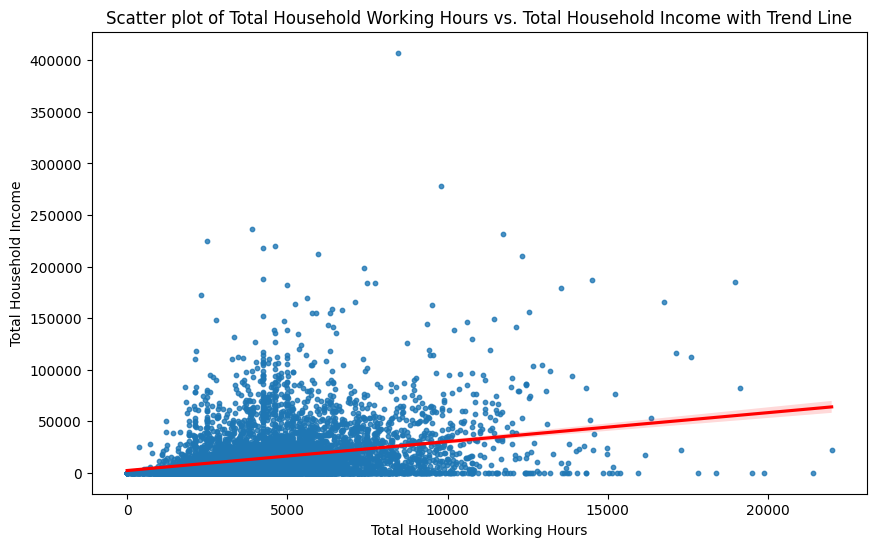

In [294]:
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x=df['hh_work_hours'], y=df['hh_income'], scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter plot of Total Household Working Hours vs. Total Household Income with Trend Line')
plt.xlabel('Total Household Working Hours')
plt.ylabel('Total Household Income')
plt.show()

In [319]:
# Calculate the correlation coefficient
correlation = np.corrcoef(muc4a2['hh_work_hours'], muc4a2['hh_income'])[0, 1]
print(f'Correlation Coefficient: {correlation}')

Correlation Coefficient: 0.2921928063922854


In [320]:
import statsmodels.api as sm

# Prepare the data for regression (add constant term for intercept)
X = muc4a2['hh_work_hours']
X = sm.add_constant(X)  # Adds a constant (intercept) to the model
y = muc4a2['hh_income']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary to get the p-value and coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              hh_income   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     3281.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:43:18   Log-Likelihood:            -4.1104e+05
No. Observations:               35154   AIC:                         8.221e+05
Df Residuals:                   35152   BIC:                         8.221e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1446.2934    315.289      4.587

In [297]:
# Import income file
muc4a = pd.read_csv(os.path.join(data_path, 'muc4a.csv'))

# Define the required columns (household identifiers + selected variables)
# m4ac7: average days work per month, m4ac8: average hours work per day
# m4ac11: cash received from main job, m4ac12f: other salary
# m4ac21: cash received from secondary job, m4ac22f: other salary 1, m4ac25: other salary 2
# m4ac27: average hours per day for secondary job
columns4a = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm4ac6', 'm4ac7', 'm4ac8', 
           'm4ac16', 'm4ac17', 'm4ac18', 'm4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']

# Filter the dataset to keep only the selected columns
muc4a = muc4a[columns4a]

# Create a new column that sums the selected variables for individual's income
muc4a['indi_income'] = muc4a[['m4ac11', 'm4ac12f','m4ac21', 'm4ac22f', 'm4ac25']].sum(axis=1)

# Group by household ID to calculate total household income
hh_income = muc4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_income'].sum().reset_index()

# Rename column for clarity
hh_income.rename(columns={'indi_income': 'HH_Income'}, inplace=True)

# Merge household income back into the individual-level dataset
muc4a = muc4a.merge(hh_income, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Fill NaN values with zero
muc4a.fillna(0, inplace=True)

# Create a new dataframe to merge all files
df = df.merge(muc4a, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv'], how='left')

In [298]:
# Load household expenditure of food and drinks during holidays (5A1)
muc5a1 = pd.read_csv(os.path.join(data_path, 'muc5a1.csv'))

# Define the required columns (household identifiers + selected variables)
# m5a1c2b: expense bought, m5a1c3b: expense self supplied or received
columns5a1 = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5a1c2b', 'm5a1c3b']

# Filter the dataset to keep only the selected columns
muc5a1 = muc5a1[columns5a1]

# Group by household ID and sum the expenses
exp1 = muc5a1.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])[['m5a1c2b', 'm5a1c3b']].sum().reset_index()

# Create a new column for total expense
exp1['HH_exp1'] = exp1['m5a1c2b'] + exp1['m5a1c3b']

# Merge back to the original dataset
muc5a1 = muc5a1.merge(exp1, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Drop duplicates so that each 'hoso' appears only once
muc5a1 = muc5a1.drop_duplicates(subset=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], keep='first')

muc5a1

,tinh,huyen,xa,diaban,hoso,m5a1c2b_x,m5a1c3b_x,m5a1c2b_y,m5a1c3b_y,HH_exp1
0,101,1,3.0,1,13,336.0,0.0,1288.3,296.1,1584.4
17,101,1,3.0,1,14,153.6,NaN,3473.3,1146.0,4619.3
40,101,1,3.0,1,15,86.4,NaN,2957.7,573.0,3530.7
63,101,1,9.0,19,15,28.8,0.0,1555.2,0.0,1555.2
80,101,1,9.0,19,19,76.8,NaN,1852.8,0.0,1852.8
...,...,...,...,...,...,...,...,...,...,...
134602,823,13,12.0,25,15,4.8,NaN,278.4,38.2,316.6
134612,823,13,12.0,25,19,164.7,NaN,573.7,81.9,655.6
134625,823,13,17.0,1,13,19.2,NaN,242.5,286.5,529.0
134634,823,13,17.0,1,14,100.0,0.0,482.0,0.0,482.0


In [299]:
# Create a new dataframe to merge all files
df = muc5a1.merge(df, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
df

,tinh,huyen,xa,diaban,hoso,m5a1c2b_x,m5a1c3b_x,m5a1c2b_y,m5a1c3b_y,HH_exp1,...,m4ac16_y,m4ac17_y,m4ac18_y,m4ac11_y,m4ac12f_y,m4ac21_y,m4ac22f_y,m4ac25_y,indi_income_y,HH_Income
0,101,1,3.0,1,14,153.6,NaN,3473.3,1146.0,4619.3,...,0.0,0.0,0.0,39528.0,2823,0.0,0,0.0,42351.0,56468.0
1,101,1,3.0,1,15,86.4,NaN,2957.7,573.0,3530.7,...,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,42351.0
2,101,1,9.0,19,15,28.8,0.0,1555.2,0.0,1555.2,...,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
3,101,1,9.0,19,20,103.7,NaN,1993.9,0.0,1993.9,...,0.0,0.0,0.0,33061.0,918,0.0,0,0.0,33979.0,47203.0
4,101,1,15.0,50,13,115.2,NaN,5259.8,0.0,5259.8,...,0.0,0.0,0.0,79055.0,12800,0.0,0,0.0,91855.0,163382.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,4.8,NaN,278.4,38.2,316.6,...,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,27677.0
6893,823,13,12.0,25,19,164.7,NaN,573.7,81.9,655.6,...,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
6894,823,13,17.0,1,13,19.2,NaN,242.5,286.5,529.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
6895,823,13,17.0,1,14,100.0,0.0,482.0,0.0,482.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0


In [300]:
# Load household daily expenditure on food and drinks
muc5a2 = pd.read_csv(os.path.join(data_path, 'muc5a2.csv'))

# Define the required columns (household identifiers + selected variables)
# m5a2c6: expense bought, m5a2c10: expense self supplied or received
columns5a2 = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5a2c6', 'm5a2c10']

# Filter the dataset to keep only the selected columns
muc5a2 = muc5a2[columns5a2]

# Group by household ID and sum the expenses
exp2 = muc5a2.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])[['m5a2c6', 'm5a2c10']].sum().reset_index()

# Create a new column for total expense
exp2['HH_exp2'] = exp2['m5a2c6'] + exp2['m5a2c10']

# Merge back to the original dataset
muc5a2 = muc5a2.merge(exp2, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Drop duplicates so that each 'hoso' appears only once
muc5a2 = muc5a2.drop_duplicates(subset=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], keep='first')

muc5a2

,tinh,huyen,xa,diaban,hoso,m5a2c6_x,m5a2c10_x,m5a2c6_y,m5a2c10_y,HH_exp2
0,101,1,3,1,13,345.6,NaN,24438.8,0.0,24438.8
43,101,1,3,1,14,36.5,NaN,36904.7,0.0,36904.7
95,101,1,3,1,15,208.8,NaN,38741.9,0.0,38741.9
150,101,1,9,19,15,715.2,NaN,17770.4,0.0,17770.4
178,101,1,9,19,19,96.0,NaN,20078.0,0.0,20078.0
...,...,...,...,...,...,...,...,...,...,...
310363,823,13,12,25,15,144.0,NaN,10468.8,2578.5,13047.3
310385,823,13,12,25,19,175.2,NaN,8964.7,1092.0,10056.7
310411,823,13,17,1,13,22.8,NaN,7349.5,1056.2,8405.7
310426,823,13,17,1,14,180.0,NaN,9983.0,3600.0,13583.0


In [301]:
# Create a new dataframe to merge all files
df = muc5a2.merge(muc123a, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
df

,tinh,huyen,xa,diaban,hoso,m5a2c6_x,m5a2c10_x,m5a2c6_y,m5a2c10_y,HH_exp2,matv,hsize,m1ac2,m1ac3,m1ac6
0,101,1,3,1,14,36.5,NaN,36904.7,0.0,36904.7,1,3,1,1,2.0
1,101,1,3,1,15,208.8,NaN,38741.9,0.0,38741.9,1,2,1,1,2.0
2,101,1,9,19,15,715.2,NaN,17770.4,0.0,17770.4,1,2,1,1,2.0
3,101,1,9,19,20,768.0,NaN,22501.7,0.0,22501.7,1,3,1,1,2.0
4,101,1,15,50,13,259.2,NaN,51339.0,0.0,51339.0,1,4,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12,25,15,144.0,NaN,10468.8,2578.5,13047.3,1,6,1,1,2.0
6893,823,13,12,25,19,175.2,NaN,8964.7,1092.0,10056.7,1,4,1,1,2.0
6894,823,13,17,1,13,22.8,NaN,7349.5,1056.2,8405.7,1,3,1,1,2.0
6895,823,13,17,1,14,180.0,NaN,9983.0,3600.0,13583.0,1,5,1,1,2.0


In [302]:
# Load household daily expenditure on nonfood and others
muc5b1 = pd.read_csv(os.path.join(data_path, 'muc5b1.csv'))

# Define the required columns (household identifiers + selected variables)
# m5b1c4: expense recieved, m5b1c5: annual expense
columns5b1 = ['tinh', 'huyen', 'xa', 'diaban', 'hoso','m5b1c4', 'm5b1c5']

# Filter the dataset to keep only the selected columns
muc5b1 = muc5b1[columns5b1]

# Group by household ID and sum the expenses
exp3 = muc5b1.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])[['m5b1c4','m5b1c5']].sum().reset_index()

# Create a new column for total expense
exp3['HH_exp3'] = exp3['m5b1c4'] + exp3['m5b1c5'] 

# Merge back to the original dataset
muc5b1 = muc5b1.merge(exp3, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Drop duplicates so that each 'hoso' appears only once
muc5b1 = muc5b1.drop_duplicates(subset=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], keep='first')

muc5b1

,tinh,huyen,xa,diaban,hoso,m5b1c4_x,m5b1c5_x,m5b1c4_y,m5b1c5_y,HH_exp3
0,101,1,3.0,1,13,14.0,0.0,7560.0,0.0,7560.0
15,101,1,3.0,1,14,360.0,0.0,21586.0,0.0,21586.0
34,101,1,3.0,1,15,300.0,0.0,21488.0,0.0,21488.0
52,101,1,9.0,19,15,120.0,0.0,7012.0,0.0,7012.0
66,101,1,9.0,19,19,105.0,0.0,8190.0,0.0,8190.0
...,...,...,...,...,...,...,...,...,...,...
117718,823,13,12.0,25,15,204.0,0.0,1516.0,300.0,1816.0
117729,823,13,12.0,25,19,480.0,NaN,2070.0,600.0,2670.0
117742,823,13,17.0,1,13,200.0,0.0,911.0,720.0,1631.0
117751,823,13,17.0,1,14,120.0,0.0,1056.0,1080.0,2136.0


In [303]:
# Create a new dataframe to merge all files
df = muc5b1.merge(df, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
df

,tinh,huyen,xa,diaban,hoso,m5b1c4_x,m5b1c5_x,m5b1c4_y,m5b1c5_y,HH_exp3,m5a2c6_x,m5a2c10_x,m5a2c6_y,m5a2c10_y,HH_exp2,matv,hsize,m1ac2,m1ac3,m1ac6
0,101,1,3.0,1,14,360.0,0.0,21586.0,0.0,21586.0,36.5,NaN,36904.7,0.0,36904.7,1,3,1,1,2.0
1,101,1,3.0,1,15,300.0,0.0,21488.0,0.0,21488.0,208.8,NaN,38741.9,0.0,38741.9,1,2,1,1,2.0
2,101,1,9.0,19,15,120.0,0.0,7012.0,0.0,7012.0,715.2,NaN,17770.4,0.0,17770.4,1,2,1,1,2.0
3,101,1,9.0,19,20,55.0,0.0,9280.0,0.0,9280.0,768.0,NaN,22501.7,0.0,22501.7,1,3,1,1,2.0
4,101,1,15.0,50,13,420.0,0.0,17447.0,0.0,17447.0,259.2,NaN,51339.0,0.0,51339.0,1,4,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,204.0,0.0,1516.0,300.0,1816.0,144.0,NaN,10468.8,2578.5,13047.3,1,6,1,1,2.0
6893,823,13,12.0,25,19,480.0,NaN,2070.0,600.0,2670.0,175.2,NaN,8964.7,1092.0,10056.7,1,4,1,1,2.0
6894,823,13,17.0,1,13,200.0,0.0,911.0,720.0,1631.0,22.8,NaN,7349.5,1056.2,8405.7,1,3,1,1,2.0
6895,823,13,17.0,1,14,120.0,0.0,1056.0,1080.0,2136.0,180.0,NaN,9983.0,3600.0,13583.0,1,5,1,1,2.0


In [304]:
# Load household annual consumption expenditure 
muc5b2 = pd.read_csv(os.path.join(data_path, 'muc5b2.csv'))

# Define the required columns (household identifiers + selected variables)
# m5b2c2: expense bought, m5b2c3: expense self supplied or received
columns5b2 = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5b2c2', 'm5b2c3']

# Filter the dataset to keep only the selected columns
muc5b2 = muc5b2[columns5b2]

# Group by household ID and sum the expenses
exp4 = muc5b2.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])[['m5b2c2', 'm5b2c3']].sum().reset_index()
muc5b2
# Create a new column for total expense
exp4['HH_exp4'] = exp4['m5b2c2'] + exp4['m5b2c3']

# Merge back to the original dataset
muc5b2 = muc5b2.merge(exp4, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Drop duplicates so that each 'hoso' appears only once
muc5b2 = muc5b2.drop_duplicates(subset=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], keep='first')

muc5b2

,tinh,huyen,xa,diaban,hoso,m5b2c2_x,m5b2c3_x,m5b2c2_y,m5b2c3_y,HH_exp4
0,101,1,3.0,1,13,90.0,0.0,7350.0,0.0,7350.0
16,101,1,3.0,1,14,400.0,0.0,18950.0,0.0,18950.0
41,101,1,3.0,1,15,300.0,0.0,16235.0,0.0,16235.0
64,101,1,9.0,19,15,300.0,0.0,7130.0,0.0,7130.0
78,101,1,9.0,19,19,50.0,0.0,8060.0,0.0,8060.0
...,...,...,...,...,...,...,...,...,...,...
117872,823,13,12.0,25,15,10.0,0.0,391.0,0.0,391.0
117881,823,13,12.0,25,19,20.0,0.0,970.0,0.0,970.0
117890,823,13,17.0,1,13,30.0,0.0,355.0,0.0,355.0
117893,823,13,17.0,1,14,100.0,0.0,760.0,0.0,760.0


In [305]:
# Create a new dataframe to merge all files
df = muc5b2.merge(df, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
df

,tinh,huyen,xa,diaban,hoso,m5b2c2_x,m5b2c3_x,m5b2c2_y,m5b2c3_y,HH_exp4,...,m5a2c6_x,m5a2c10_x,m5a2c6_y,m5a2c10_y,HH_exp2,matv,hsize,m1ac2,m1ac3,m1ac6
0,101,1,3.0,1,14,400.0,0.0,18950.0,0.0,18950.0,...,36.5,NaN,36904.7,0.0,36904.7,1,3,1,1,2.0
1,101,1,3.0,1,15,300.0,0.0,16235.0,0.0,16235.0,...,208.8,NaN,38741.9,0.0,38741.9,1,2,1,1,2.0
2,101,1,9.0,19,15,300.0,0.0,7130.0,0.0,7130.0,...,715.2,NaN,17770.4,0.0,17770.4,1,2,1,1,2.0
3,101,1,9.0,19,20,520.0,0.0,10040.0,0.0,10040.0,...,768.0,NaN,22501.7,0.0,22501.7,1,3,1,1,2.0
4,101,1,15.0,50,13,1140.0,0.0,17091.0,0.0,17091.0,...,259.2,NaN,51339.0,0.0,51339.0,1,4,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,10.0,0.0,391.0,0.0,391.0,...,144.0,NaN,10468.8,2578.5,13047.3,1,6,1,1,2.0
6893,823,13,12.0,25,19,20.0,0.0,970.0,0.0,970.0,...,175.2,NaN,8964.7,1092.0,10056.7,1,4,1,1,2.0
6894,823,13,17.0,1,13,30.0,0.0,355.0,0.0,355.0,...,22.8,NaN,7349.5,1056.2,8405.7,1,3,1,1,2.0
6895,823,13,17.0,1,14,100.0,0.0,760.0,0.0,760.0,...,180.0,NaN,9983.0,3600.0,13583.0,1,5,1,1,2.0


In [306]:
# Load other spending that is considered as household expenditure
muc5b3 = pd.read_csv(os.path.join(data_path, 'muc5b3.csv'))

# Define the required columns (household identifiers + selected variables)
# m5b3c2: annual expense
columns5b3 = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5b3c2']

# Filter the dataset to keep only the selected columns
muc5b3 = muc5b3[columns5b3]

# Group by household ID and sum the expenses
exp5 = muc5b3.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])[['m5b3c2']].sum().reset_index()

# Create a new column for total expense
exp5['HH_exp5'] = exp5['m5b3c2']

# Merge back to the original dataset
muc5b3 = muc5b3.merge(exp5, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Drop duplicates so that each 'hoso' appears only once
muc5b3 = muc5b3.drop_duplicates(subset=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], keep='first')

muc5b3

,tinh,huyen,xa,diaban,hoso,m5b3c2_x,m5b3c2_y,HH_exp5
0,101,1,3.0,1,13,70.0,2570.0,2570.0
3,101,1,3.0,1,14,4000.0,8150.0,8150.0
8,101,1,3.0,1,15,5000.0,7850.0,7850.0
12,101,1,9.0,19,15,60.0,760.0,760.0
15,101,1,9.0,19,19,70.0,770.0,770.0
...,...,...,...,...,...,...,...,...
31636,823,13,12.0,25,15,NaN,0.0,0.0
31637,823,13,12.0,25,19,NaN,0.0,0.0
31638,823,13,17.0,1,13,70.0,70.0,70.0
31639,823,13,17.0,1,14,300.0,300.0,300.0


In [307]:
# Create a new dataframe to merge all files
df = muc5b3.merge(df, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
df

,tinh,huyen,xa,diaban,hoso,m5b3c2_x,m5b3c2_y,HH_exp5,m5b2c2_x,m5b2c3_x,...,m5a2c6_x,m5a2c10_x,m5a2c6_y,m5a2c10_y,HH_exp2,matv,hsize,m1ac2,m1ac3,m1ac6
0,101,1,3.0,1,14,4000.0,8150.0,8150.0,400.0,0.0,...,36.5,NaN,36904.7,0.0,36904.7,1,3,1,1,2.0
1,101,1,3.0,1,15,5000.0,7850.0,7850.0,300.0,0.0,...,208.8,NaN,38741.9,0.0,38741.9,1,2,1,1,2.0
2,101,1,9.0,19,15,60.0,760.0,760.0,300.0,0.0,...,715.2,NaN,17770.4,0.0,17770.4,1,2,1,1,2.0
3,101,1,9.0,19,20,70.0,640.0,640.0,520.0,0.0,...,768.0,NaN,22501.7,0.0,22501.7,1,3,1,1,2.0
4,101,1,15.0,50,13,300.0,1800.0,1800.0,1140.0,0.0,...,259.2,NaN,51339.0,0.0,51339.0,1,4,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,NaN,0.0,0.0,10.0,0.0,...,144.0,NaN,10468.8,2578.5,13047.3,1,6,1,1,2.0
6893,823,13,12.0,25,19,NaN,0.0,0.0,20.0,0.0,...,175.2,NaN,8964.7,1092.0,10056.7,1,4,1,1,2.0
6894,823,13,17.0,1,13,70.0,70.0,70.0,30.0,0.0,...,22.8,NaN,7349.5,1056.2,8405.7,1,3,1,1,2.0
6895,823,13,17.0,1,14,300.0,300.0,300.0,100.0,0.0,...,180.0,NaN,9983.0,3600.0,13583.0,1,5,1,1,2.0


In [308]:
# Load household's accomodation expenditure
muc7 = pd.read_csv(os.path.join(data_path, 'muc7.csv'))

# Define the required columns (household identifiers + selected variables)
# m7c15: land or house/flat leasing
# m7c32: annual water expense, m7c36: annual electricity expense , m7c39: annual garbage collection expense
columns7 = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm7c15', 'm7c32', 'm7c36', 'm7c39']

# Filter the dataset to keep only the selected columns
muc7 = muc7[columns7]

# Calculate total housing expense
muc7['HH_exp6'] = muc7['m7c32'] + muc7['m7c36'] + muc7['m7c39']

muc7

,tinh,huyen,xa,diaban,hoso,m7c15,m7c32,m7c36,m7c39,HH_exp6
0,101,1,3.0,1,13,NaN,840.0,3720.0,108.0,4668.0
1,101,1,3.0,1,14,NaN,720.0,3000.0,108.0,3828.0
2,101,1,3.0,1,15,NaN,1000.0,5000.0,72.0,6072.0
3,101,1,9.0,19,15,NaN,180.0,1440.0,72.0,1692.0
4,101,1,9.0,19,19,NaN,180.0,1680.0,108.0,1968.0
...,...,...,...,...,...,...,...,...,...,...
9184,823,13,12.0,25,15,NaN,NaN,840.0,NaN,NaN
9185,823,13,12.0,25,19,NaN,NaN,600.0,NaN,NaN
9186,823,13,17.0,1,13,NaN,NaN,NaN,NaN,NaN
9187,823,13,17.0,1,14,NaN,NaN,NaN,NaN,NaN


In [309]:
# Create a new dataframe to merge all files
df = muc7.merge(df, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6897 entries, 0 to 6896
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tinh       6897 non-null   int64  
 1   huyen      6897 non-null   int64  
 2   xa         6897 non-null   float64
 3   diaban     6897 non-null   int64  
 4   hoso       6897 non-null   int64  
 5   m7c15      89 non-null     float64
 6   m7c32      1718 non-null   float64
 7   m7c36      6657 non-null   float64
 8   m7c39      1726 non-null   float64
 9   HH_exp6    969 non-null    float64
 10  m5b3c2_x   6853 non-null   float64
 11  m5b3c2_y   6897 non-null   float64
 12  HH_exp5    6897 non-null   float64
 13  m5b2c2_x   6896 non-null   float64
 14  m5b2c3_x   6896 non-null   float64
 15  m5b2c2_y   6897 non-null   float64
 16  m5b2c3_y   6897 non-null   float64
 17  HH_exp4    6897 non-null   float64
 18  m5b1c4_x   6489 non-null   float64
 19  m5b1c5_x   6484 non-null   float64
 20  m5b1c4_y

In [310]:
# Import household fixed assets (6A)
muc6a = pd.read_csv(os.path.join(data_path, 'muc6a.csv'))

# Define the required columns (household identifiers + selected variables)
# m6ac3: quantity of the assets, m6ac6: assets' value at current price, m6ac7: percentage of ownership
muc6a['m6ac7'] = muc6a['m6ac7'] / 100
columns6a = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm6ac3', 'm6ac6', 'm6ac7']

# Filter the dataset to keep only the selected columns
muc6a = muc6a[columns6a].fillna(0)

# Calculate total household fixed assets wealth
muc6a['HH_wealth1'] = muc6a['m6ac3'] * muc6a['m6ac6'] * muc6a['m6ac7']

# Aggregate total wealth by household
hh_wealth1 = muc6a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'], as_index=False)['HH_wealth1'].sum()

# Import household durable goods (6B)
muc6b = pd.read_csv(os.path.join(data_path, 'muc6b.csv'))

# Define the required columns (household identifiers + selected variables)
# m6bc3: quantity of the durable appliance, m6bc6: durable appliance value at current price
columns6b = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm6bc3', 'm6bc6']

# Filter the dataset to keep only the selected columns
muc6b = muc6b[columns6b].fillna(0)

# Calculate total household durable appliance wealth
muc6b['HH_wealth2'] = muc6b['m6bc3'] * muc6b['m6bc6']

# Aggregate total durable appliance wealth by household
hh_wealth2 = muc6b.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'], as_index=False)['HH_wealth2'].sum()

# Merge wealth data into df
df = df.merge(hh_wealth1, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')
df = df.merge(hh_wealth2, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Fill missing values with 0 (in case some households have no assets or durable goods)
df[['HH_wealth1', 'HH_wealth2']] = df[['HH_wealth1', 'HH_wealth2']].fillna(0)

# Calculate total household wealth
df['HH_Wealth'] = df['HH_wealth1'] + df['HH_wealth2']

df


,tinh,huyen,xa,diaban,hoso,m7c15,m7c32,m7c36,m7c39,HH_exp6,...,m5a2c10_y,HH_exp2,matv,hsize,m1ac2,m1ac3,m1ac6,HH_wealth1,HH_wealth2,HH_Wealth
0,101,1,3.0,1,14,NaN,720.0,3000.0,108.0,3828.0,...,0.0,36904.7,1,3,1,1,2.0,0.0,107450.0,107450.0
1,101,1,3.0,1,15,NaN,1000.0,5000.0,72.0,6072.0,...,0.0,38741.9,1,2,1,1,2.0,0.0,68300.0,68300.0
2,101,1,9.0,19,15,NaN,180.0,1440.0,72.0,1692.0,...,0.0,17770.4,1,2,1,1,2.0,0.0,21800.0,21800.0
3,101,1,9.0,19,20,NaN,180.0,1440.0,120.0,1740.0,...,0.0,22501.7,1,3,1,1,2.0,0.0,29500.0,29500.0
4,101,1,15.0,50,13,NaN,840.0,3600.0,60.0,4500.0,...,0.0,51339.0,1,4,1,1,2.0,0.0,55150.0,55150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,NaN,NaN,840.0,NaN,NaN,...,2578.5,13047.3,1,6,1,1,2.0,0.0,450.0,450.0
6893,823,13,12.0,25,19,NaN,NaN,600.0,NaN,NaN,...,1092.0,10056.7,1,4,1,1,2.0,45000.0,11600.0,56600.0
6894,823,13,17.0,1,13,NaN,NaN,NaN,NaN,NaN,...,1056.2,8405.7,1,3,1,1,2.0,0.0,1750.0,1750.0
6895,823,13,17.0,1,14,NaN,NaN,NaN,NaN,NaN,...,3600.0,13583.0,1,5,1,1,2.0,0.0,1550.0,1550.0


In [311]:
# Import household fixed assets (6A)
muc6a = pd.read_csv(os.path.join(data_path, 'muc6a.csv'))

# Define the required columns (household identifiers + selected variables)
# m6ac3: quantity of the assets, m6ac6: assets' value at current price , m6ac7: percentage of ownership
muc6a['m6ac7'] = muc6a['m6ac7']/100
columns6a = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm6ac3', 'm6ac6', 'm6ac7']

# Filter the dataset to keep only the selected columns
muc6a = muc6a[columns6a]
muc6a.fillna(0, inplace=True)

# Calculate total household assets
muc6a['HH_wealth1'] = muc6a['m6ac3'] * muc6a['m6ac6'] * muc6a['m6ac7']

# Group by household to get total wealth per household
hh_wealth1 = muc6a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'], as_index=False)['HH_wealth1'].sum()

# Merge back to the original dataset
muc6a = muc6a.merge(hh_wealth1, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

muc6a

,tinh,huyen,xa,diaban,hoso,m6ac3,m6ac6,m6ac7,HH_wealth1_x,HH_wealth1_y
0,101,1,3.0,1,13,0.0,0.0,0.0,0.0,0.0
1,101,1,3.0,1,14,0.0,0.0,0.0,0.0,0.0
2,101,1,3.0,1,15,0.0,0.0,0.0,0.0,0.0
3,101,1,9.0,19,15,0.0,0.0,0.0,0.0,0.0
4,101,1,9.0,19,19,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18143,823,13,12.0,25,15,0.0,0.0,0.0,0.0,0.0
18144,823,13,12.0,25,19,1.0,45000.0,1.0,45000.0,45000.0
18145,823,13,17.0,1,13,0.0,0.0,0.0,0.0,0.0
18146,823,13,17.0,1,14,0.0,0.0,0.0,0.0,0.0


In [312]:
# Create a new dataframe to merge all files
df = muc6a.merge(df, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')

In [313]:
# Import household durable goods (6B)
muc6b = pd.read_csv(os.path.join(data_path, 'muc6b.csv'))

# Define the required columns (household identifiers + selected variables)
# m6bc3: quantity of the durable applicance, m6bc6: durable appliance value at current price 
columns6b = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm6bc3', 'm6bc6']

# Filter the dataset to keep only the selected columns
muc6b = muc6b[columns6b]
muc6b.fillna(0, inplace=True)

# Calculate total durable goods value of household 
muc6b['HH_wealth2'] = muc6b['m6bc3'] * muc6b['m6bc6']

# Group by household to get total wealth per household
hh_wealth2 = muc6b.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'], as_index=False)['HH_wealth2'].sum()

# Merge back to the original dataset
muc6b = muc6b.merge(hh_wealth2, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

muc6b

,tinh,huyen,xa,diaban,hoso,m6bc3,m6bc6,HH_wealth2_x,HH_wealth2_y
0,101,1,3.0,1,13,2.0,1700.0,3400.0,24450.0
1,101,1,3.0,1,13,1.0,3000.0,3000.0,24450.0
2,101,1,3.0,1,13,1.0,6000.0,6000.0,24450.0
3,101,1,3.0,1,13,2.0,500.0,1000.0,24450.0
4,101,1,3.0,1,13,1.0,400.0,400.0,24450.0
...,...,...,...,...,...,...,...,...,...
102088,823,13,17.0,1,14,1.0,1000.0,1000.0,1550.0
102089,823,13,17.0,1,14,1.0,150.0,150.0,1550.0
102090,823,13,17.0,1,20,1.0,10.0,10.0,1160.0
102091,823,13,17.0,1,20,1.0,150.0,150.0,1160.0


In [314]:
# Create a new dataframe to merge all files
df = muc6b.merge(df, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')

In [315]:
df['HH_Wealth'] = df['HH_wealth1'] + df['HH_wealth2'] 
df

,tinh,huyen,xa,diaban,hoso,m6bc3,m6bc6,HH_wealth2_x,HH_wealth2_y,m6ac3,...,m5a2c10_y,HH_exp2,matv,hsize,m1ac2,m1ac3,m1ac6,HH_wealth1,HH_wealth2,HH_Wealth
0,101,1,3.0,1,14,1.0,2500.0,2500.0,107450.0,0.0,...,0.0,36904.7,1,3,1,1,2.0,0.0,107450.0,107450.0
1,101,1,3.0,1,14,1.0,15000.0,15000.0,107450.0,0.0,...,0.0,36904.7,1,3,1,1,2.0,0.0,107450.0,107450.0
2,101,1,3.0,1,14,1.0,450.0,450.0,107450.0,0.0,...,0.0,36904.7,1,3,1,1,2.0,0.0,107450.0,107450.0
3,101,1,3.0,1,14,1.0,4000.0,4000.0,107450.0,0.0,...,0.0,36904.7,1,3,1,1,2.0,0.0,107450.0,107450.0
4,101,1,3.0,1,14,3.0,2900.0,8700.0,107450.0,0.0,...,0.0,36904.7,1,3,1,1,2.0,0.0,107450.0,107450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167787,823,13,17.0,1,14,1.0,1000.0,1000.0,1550.0,0.0,...,3600.0,13583.0,1,5,1,1,2.0,0.0,1550.0,1550.0
167788,823,13,17.0,1,14,1.0,150.0,150.0,1550.0,0.0,...,3600.0,13583.0,1,5,1,1,2.0,0.0,1550.0,1550.0
167789,823,13,17.0,1,20,1.0,10.0,10.0,1160.0,1.0,...,1638.0,16384.2,1,4,1,1,2.0,700.0,1160.0,1860.0
167790,823,13,17.0,1,20,1.0,150.0,150.0,1160.0,1.0,...,1638.0,16384.2,1,4,1,1,2.0,700.0,1160.0,1860.0


In [316]:
# m4ac6: working months annually (first),  m4ac7: average days work per month (first), m4ac8: average hours work per day (first)
# m4ac16: working months annually (secondary),  m4ac17: average days work per month (secondary), m4ac18: average hours work per day (secondary)
# m4ac11: cash received from main job, m4ac12f: other salary
# m4ac21: cash received from secondary job, m4ac22f: other salary 1, m4ac25: other salary 2

In [317]:
muc4a['m4ac6']

0         0.0
1        12.0
2         0.0
3        12.0
4         6.0
         ... 
35149     6.0
35150     0.0
35151     0.0
35152    12.0
35153     0.0
Name: m4ac6, Length: 35154, dtype: float64

In [318]:
# Define relevant columns
columns = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm4ac6', 'm4ac7', 'm4ac8', 
           'm4ac16', 'm4ac17', 'm4ac18', 'm4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']

# Ensure only existing columns are selected
columns = [col for col in columns if col in muc4a.columns]

# Select only available columns
muc4a2 = muc4a[columns].copy()

# Define income-related columns
income_cols = ['m4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']
income_cols = [col for col in income_cols if col in muc4a2.columns]

# Compute individual income (handle missing columns)
muc4a2['indi_income'] = muc4a2[income_cols].sum(axis=1) if income_cols else 0

# Compute total household income
hh_income = muc4a2.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_income'].sum().reset_index()
hh_income.rename(columns={'indi_income': 'hh_income'}, inplace=True)

# Merge total household income
muc4a2 = muc4a2.merge(hh_income, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Define work-related columns
work_cols = ['m4ac6', 'm4ac7', 'm4ac8', 'm4ac16', 'm4ac17', 'm4ac18']
work_cols = [col for col in work_cols if col in muc4a2.columns]

# Fill NaN values with 0 to avoid multiplication errors
muc4a2[work_cols] = muc4a2[work_cols].fillna(0)

# Compute total working hours for first and secondary jobs
muc4a2['total_hours_first'] = muc4a2['m4ac6'] * muc4a2['m4ac7'] * muc4a2['m4ac8']
muc4a2['total_hours_second'] = muc4a2['m4ac16'] * muc4a2['m4ac17'] * muc4a2['m4ac18']

# Compute total individual working hours
muc4a2['indi_work_hours'] = muc4a2['total_hours_first'] + muc4a2['total_hours_second']

# Compute total household working hours
hh_work_hours = muc4a2.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_work_hours'].sum().reset_index()
hh_work_hours.rename(columns={'indi_work_hours': 'hh_work_hours'}, inplace=True)

# Merge total household working hours
muc4a2 = muc4a2.merge(hh_work_hours, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Ensure household size exists and is not zero
if 'hsize' in muc4a2.columns:
    muc4a2['hsize'] = muc4a2['hsize'].replace(0, np.nan)

    # Compute percentage of available time spent working
    muc4a2['hh_work_percentage'] = (muc4a2['hh_work_hours'] / (muc4a2['hsize'] * 8760)) * 100

    # Fill NaN values (in case of zero or missing household size)
    muc4a2['hh_work_percentage'].fillna(0, inplace=True)

# Fill any remaining NaN values
muc4a2.fillna(0, inplace=True)

# Display the updated dataset
muc4a2

# Create a new dataframe to merge all files
df = df.merge(muc4a2, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv'], how='left')
